<center>
    <h1>Data analysis in Python</h1>
    <br>
    <h2>Tim Mulder</h2>
    <br>
    <h3>Hyperthermia Unit, Radiation Oncology
        <br>
        Erasmus MC, Rotterdam</h3>
</center>

# Regression
* What is regression?
* Linear regression

## What is regression?

From Merriam-Webster:

"A functional relationship between two or more correlated variables that is often empirically determined from data and is used especially to predict values of one variable when given values of the others"

Various libraries are available for regression


We'll be using:
* Statsmodels for linear regression
* Lifelines for survival analysis

### Load data

In [1]:
import pandas as pd

with open("regression_data.csv", "r") as f:
    data = pd.read_csv(f)
    
data.tail(10)

Applicator    firstDHT  treatmenttime  THQ50p   Trise   CEM43T90  \
198   sigma 60  2018-03-04         90.300    0.36  0.6200   0.204957   
199   sigma 60  2018-02-18        418.000    0.44  3.3600   4.285168   
200   sigma 60  2018-02-24        450.400    0.49  3.3800   2.866685   
201   sigma 60  2018-02-25        450.700    0.42  3.1400   1.575450   
202   sigma 60  2018-03-07        442.700    0.32  3.5900   4.744400   
203   sigma 60  2018-05-12        451.300    0.44  4.2700  14.267502   
204  sigma eye  2018-05-22        435.500    0.26  3.6200   3.428120   
205   sigma 60  2018-05-22        437.875    0.45  3.6375   2.250523   
206  sigma Eye  2018-05-30        425.100    0.36  3.4400   5.149892   
207  sigma Eye  2018-06-06        443.400    0.37  3.6900   3.855915   

     Target volume  Patient cross section target center BRP survival status  \
198        150.000                                 3356                   1   
199         97.125                                 3309                   1   
200        179.125                                 3048   Geen Match in GBA   
201        138.000                                 3463                   1   
202        149.625                                 3393                   1   
203        123.750                                 2555                   1   
204        298.500                                 2581                   1   
205        176.250                                 2968                   1   
206         88.625                                 2298                   1   
207        141.250                                 2521                   1   

       BRP date  
198  2019-02-17  
199  2019-02-17  
200  2019-02-17  
201  2019-02-17  
202  2019-02-17  
203  2019-02-17  
204  2019-02-17  
205  2019-02-17  
206  2019-02-17  
207  2019-02-17

Let's sanitize the data

In [2]:
data["BRP survival status"].dtype

dtype('O')

In [3]:
data["BRP survival status"] = pd.to_numeric(data["BRP survival status"], errors = "coerce")

data["BRP survival status"].dtype

dtype('float64')

In [4]:
data["BRP survival status"].tail(10) 

198    1.0
199    1.0
200    NaN
201    1.0
202    1.0
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
Name: BRP survival status, dtype: float64

In [5]:
data["firstDHT"] = pd.to_datetime(data["firstDHT"])

data["firstDHT"].tail()

203   2018-05-12
204   2018-05-22
205   2018-05-22
206   2018-05-30
207   2018-06-06
Name: firstDHT, dtype: datetime64[ns]

In [6]:
data["BRP date"] = pd.to_datetime(data["BRP date"])

data["BRP date"].tail()

203   2019-02-17
204   2019-02-17
205   2019-02-17
206   2019-02-17
207   2019-02-17
Name: BRP date, dtype: datetime64[ns]

In [7]:
data["Applicator"] = data["Applicator"].str.title()

data["Applicator"].tail()

203     Sigma 60
204    Sigma Eye
205     Sigma 60
206    Sigma Eye
207    Sigma Eye
Name: Applicator, dtype: object

In [8]:
#And save the sanitized data
data.to_csv("regression_data_sanitized.tsv", sep = "\t")

 ## Time to load your own data
 
 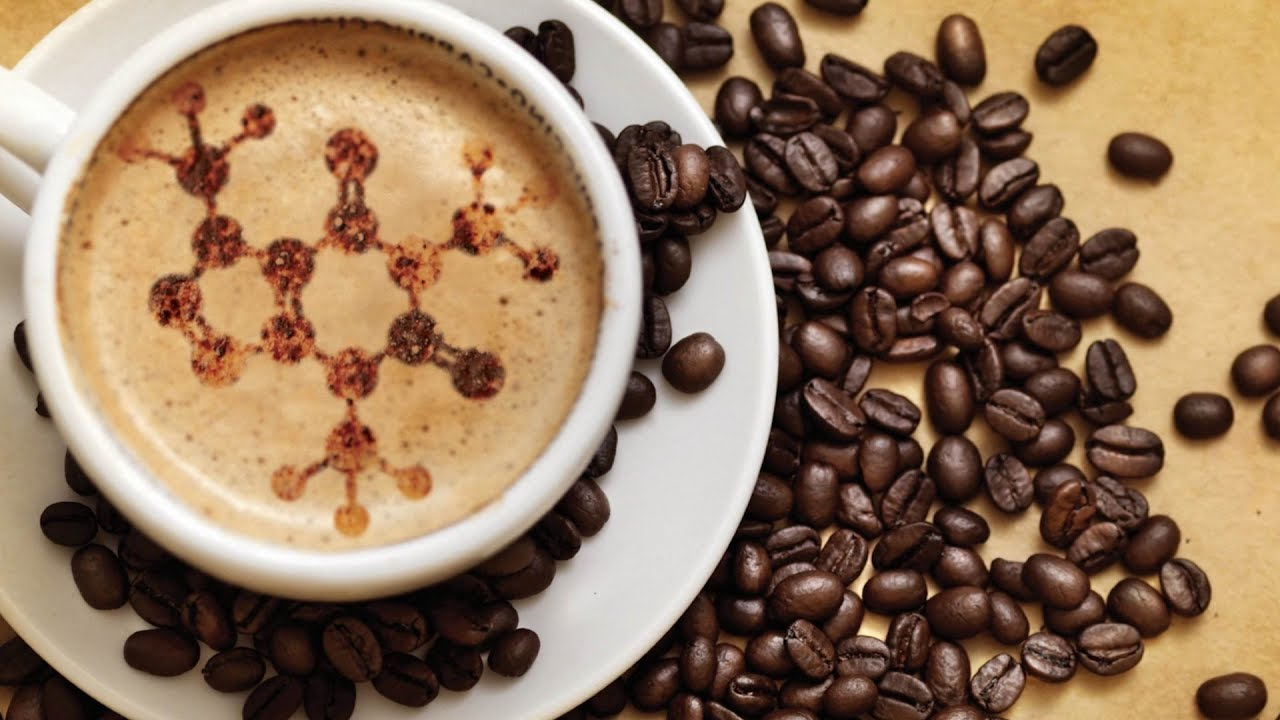
 

and cure the resulting headache with some brain doping...

# Linear regression
* Data
* Model
* Predict

### Data

In [9]:
import statsmodels.api as sm
import numpy as np

df_data = pd.DataFrame()

df_data.insert(0, "THQ50p", data["THQ50p"])
df_data.insert(0, "Trise", data["Trise"])

df_data = sm.add_constant(df_data, has_constant = "raise")

len(df_data)

/usr/lib/python3/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


208

In [10]:
df_data.dropna(inplace = True)

len(df_data)

207

In [11]:
x = df_data[["THQ50p", "const"]]

x.tail()

THQ50p  const
203    0.44    1.0
204    0.26    1.0
205    0.45    1.0
206    0.36    1.0
207    0.37    1.0

In [12]:
y = df_data["Trise"]
y.tail()

203    4.2700
204    3.6200
205    3.6375
206    3.4400
207    3.6900
Name: Trise, dtype: float64

Text(0, 0.5, 'Trise')

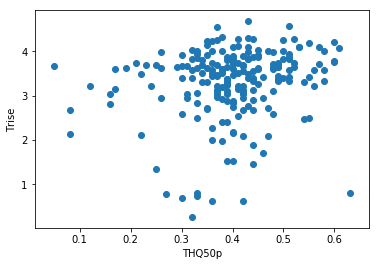

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.figure import Figure

plt.scatter(x["THQ50p"], y)
plt.xlabel("THQ50p")
plt.ylabel("Trise")

### Model

In [14]:
solver = sm.OLS(y, x)
model = solver.fit()

### Predict

In [15]:
y_pred = model.predict(x)

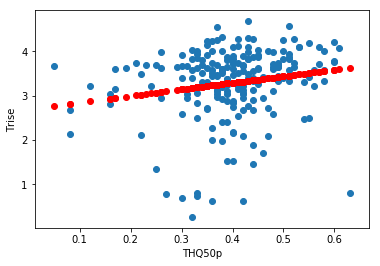

In [16]:
plt.scatter(x["THQ50p"], y)
plt.xlabel("THQ50p")
plt.ylabel("Trise")
plt.scatter(x["THQ50p"], y_pred, c = "red")

In [17]:
model.params

THQ50p    1.474991
const     2.702169
dtype: float64

In [18]:
model.pvalues

THQ50p    8.601677e-03
const     8.275053e-25
dtype: float64

<b>Hooray, THQ50p is significant!</b>

### Check for normality of the residuals

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.14204960298243774, 6.128309635659134e-11)

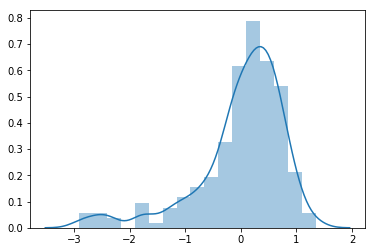

In [19]:
import seaborn as sns
sns.distplot(model.resid)

#Kolmogorov Smirnov test for normality
sm.stats.diagnostic.kstest_normal(model.resid)

P-value = 6.13e-11: residuals not normally distributed; clearly skewed

### Redo analysis using exponential transform

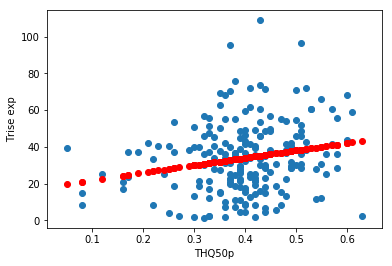

In [20]:
import numpy as np

df_data["Trise exp"] = np.exp(df_data["Trise"])
y_exp = df_data["Trise exp"]
solver_exp = sm.OLS(y_exp, x)
model_exp = solver_exp.fit()
y_pred_exp = model_exp.predict(x)

plt.scatter(x["THQ50p"], y_exp)
plt.xlabel("THQ50p")
plt.ylabel("Trise exp")
plt.scatter(x["THQ50p"], y_pred_exp, c = "red")

### Check residuals again

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.04487115858385793, 0.35993505963952493)

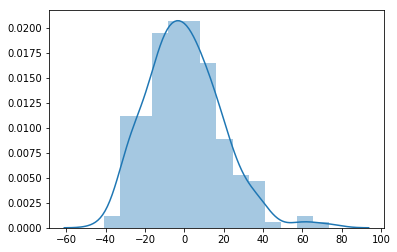

In [21]:
sns.distplot(model_exp.resid)

#Kolmogorov Smirnov test for normality
sm.stats.diagnostic.kstest_normal(model_exp.resid)

P-value = 0.36: residuals are normally distributed

In [22]:
model.params

THQ50p    1.474991
const     2.702169
dtype: float64

In [23]:
model.pvalues

THQ50p    8.601677e-03
const     8.275053e-25
dtype: float64

<b>Hooray, THQ50p is significant!</b>

Remember, significancy does not imply relevance!

In [24]:
#Explained variance
model.rsquared

0.033195204823003754

<b>Multivariable regression works the same; just add more columns to your df_data.</b>

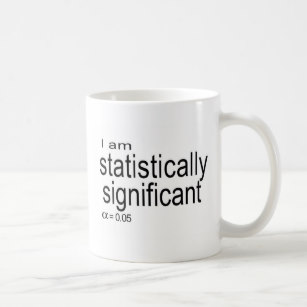

# Survival analysis
In oncology, you often encounter time to event data
* Overall survival
* Time to local recurrence
* Time to distant recurrence
etc

* Data is often censored
    * Left censoring: unsure when period started (e.g. infection with a very variable incubation time)
    * Right censoring: unsure when period stopped (e.g. still alive at consultation of BRP)

* Groups: Kaplan-Meier
* Continuous: Cox regression

## Kaplan-Meier
* Data
* Model
* Predict

* Groups are often created by splitting at the median
* Let's look at THQ50p vs Overall survival

### Data

* Get time to events
* Split into groups

In [25]:
import lifelines

#'os' means overall survival';
#'brp' is the civil registry (basisregistratie personen);
#'is' means multiple indices

#DHT startdates due to missing RT start dates for some patients

#1 = alive, 2 = deceased, 3 = lost to follow up
os_valid_is = (data["BRP survival status"] == 1) | (data["BRP survival status"] == 2)
os_firstDHT = data["firstDHT"][os_valid_is]
os_brp_date = data["BRP date"][os_valid_is]
os_brp_survival_status = data["BRP survival status"][os_valid_is]
os_thq50p = data["THQ50p"][os_valid_is]

In [26]:
os_brp_event = os_brp_survival_status == 2

os_brp_date_event = os_brp_date.copy()
os_brp_date_event[~os_brp_event] = np.NaN

#Get times in days
outcome_os_brp_t, outcome_os_brp_e = lifelines.utils.datetimes_to_durations(os_firstDHT, os_brp_date_event, freq = 'D', fill_date = os_brp_date)

outcome_os_brp_t[:5], outcome_os_brp_e[:5]

(array([2808.,  647.,  419., 2770., 1127.]),
 array([False,  True,  True, False,  True]))

In [27]:
group_lt_med_i = os_thq50p < np.nanmedian(os_thq50p)
group_ge_med_i = ~group_lt_med_i

np.count_nonzero(group_lt_med_i), np.count_nonzero(group_ge_med_i)

(92, 99)

### Model

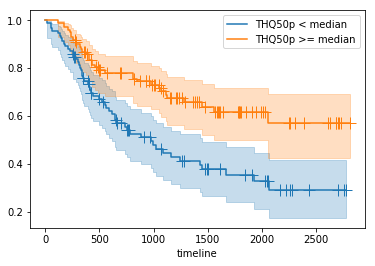

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

kmf = lifelines.KaplanMeierFitter()
outcome_t_lt_med = outcome_os_brp_t[group_lt_med_i]
outcome_e_lt_med = outcome_os_brp_e[group_lt_med_i]
kmf.fit(outcome_t_lt_med, outcome_e_lt_med, label = "THQ50p < median")

kmf.plot(show_censors=True, ax = ax)

outcome_t_ge_med = outcome_os_brp_t[group_ge_med_i]
outcome_e_ge_med = outcome_os_brp_e[group_ge_med_i]
kmf.fit(outcome_t_ge_med, outcome_e_ge_med, label = "THQ50p >= median")

kmf.plot(show_censors=True, ax = ax)

In [29]:
from lifelines.statistics import logrank_test

T1 = outcome_t_lt_med
T2 = outcome_t_ge_med

E1 = outcome_e_lt_med
E2 = outcome_e_ge_med

results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
test_statistic      p  -log2(p)
         12.24 <0.005     11.06


In [30]:
results.p_value

0.0004669262172011475

## Cox regression
* Data
* Model
* Predict

In [31]:
data_cox = pd.DataFrame()

data_cox.insert(0, "THQ50p", data["THQ50p"][os_valid_is])
data_cox.insert(0, "T", outcome_os_brp_t)
data_cox.insert(0, "E", outcome_os_brp_e)

data_cox.dropna(inplace = True)

data_cox.tail()

E      T  THQ50p
203  False  281.0    0.44
204  False  271.0    0.26
205  False  271.0    0.45
206  False  263.0    0.36
207  False  256.0    0.37

In [32]:
cph = lifelines.CoxPHFitter()
cph.fit(data_cox, "T", "E", show_progress = True)

Iteration 1: norm_delta = 0.38393, step_size = 0.9500, ll = -405.45909, newton_decrement = 5.63802, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.02160, step_size = 0.9500, ll = -400.25326, newton_decrement = 0.02276, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.00124, step_size = 0.9500, ll = -400.23046, newton_decrement = 0.00007, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00006, step_size = 1.0000, ll = -400.23039, newton_decrement = 0.00000, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -400.23039, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence completed after 5 iterations.


<lifelines.CoxPHFitter: fitted with 191 observations, 106 censored>

### Check the proportional hazard assumptions
https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html

In [33]:
cph.check_assumptions(data_cox)

Proportional hazard assumption looks okay.


THQ50p    0.000775
Name: p, dtype: float64

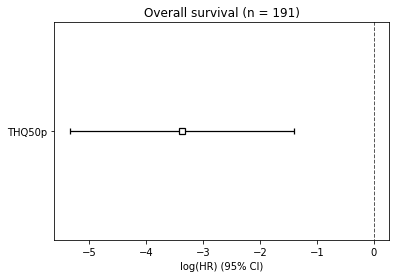

In [34]:
fig_cox = plt.figure()
ax_cox = fig_cox.add_subplot(111)

cph.plot(ax = ax_cox)

ax_cox.set_title("Overall survival (n = {})".format(len(data_cox)))

cph.summary.p

In [35]:
data_cox_2 = pd.DataFrame()

data_cox_2.insert(0, "THQ50p", data["THQ50p"][os_valid_is])
data_cox_2.insert(0, "Target volume", data["Target volume"][os_valid_is])
data_cox_2.insert(0, "Patient cross section target center", data["Patient cross section target center"][os_valid_is])

data_cox_2.insert(0, "T", outcome_os_brp_t)
data_cox_2.insert(0, "E", outcome_os_brp_e)

data_cox_2.dropna(inplace = True)

data_cox_2.tail()

E      T  Patient cross section target center  Target volume  THQ50p
203  False  281.0                                 2555        123.750    0.44
204  False  271.0                                 2581        298.500    0.26
205  False  271.0                                 2968        176.250    0.45
206  False  263.0                                 2298         88.625    0.36
207  False  256.0                                 2521        141.250    0.37

In [36]:
cph_2 = lifelines.CoxPHFitter()
cph_2.fit(data_cox_2, "T", "E", show_progress = True)

Iteration 1: norm_delta = 0.73848, step_size = 0.9500, ll = -400.20682, newton_decrement = 18.45720, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.19971, step_size = 0.9500, ll = -391.21532, newton_decrement = 4.24397, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.04518, step_size = 0.9500, ll = -386.63952, newton_decrement = 0.18528, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00438, step_size = 1.0000, ll = -386.44998, newton_decrement = 0.00164, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00002, step_size = 1.0000, ll = -386.44833, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence completed after 5 iterations.


<lifelines.CoxPHFitter: fitted with 190 observations, 106 censored>

### Check the proportional hazard assumptions

In [37]:
cph_2.check_assumptions(data_cox_2)

Proportional hazard assumption looks okay.


Patient cross section target center    0.644504
Target volume                          0.000008
THQ50p                                 0.283115
Name: p, dtype: float64

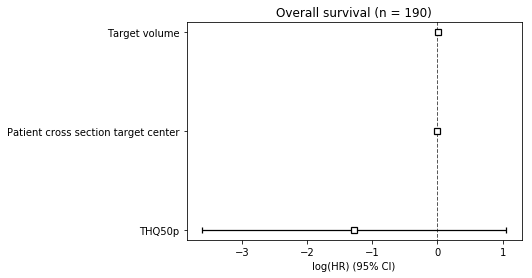

In [38]:
fig_cox_2 = plt.figure()
ax_cox_2 = fig_cox_2.add_subplot(111)

cph_2.plot(ax = ax_cox_2)

ax_cox_2.set_title("Overall survival (n = {})".format(len(data_cox_2)))

cph_2.summary.p

* Check distribution of Target Volume

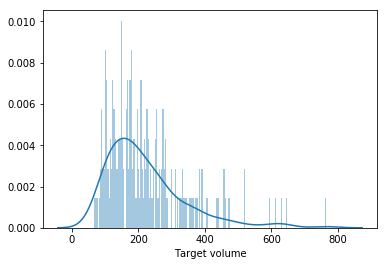

In [39]:
sns.distplot(data_cox_2["Target volume"], bins = len(data_cox_2["Target volume"]))

In [40]:
data_cox_3 = data_cox_2[data_cox_2["Target volume"] <= np.percentile(data_cox_2["Target volume"], 90)]

data_cox_3.max()

E                                         1.000
T                                      2808.000
Patient cross section target center    4969.000
Target volume                           372.125
THQ50p                                    0.630
dtype: float64

In [41]:
cph_3 = lifelines.CoxPHFitter()
cph_3.fit(data_cox_3, "T", "E", show_progress = True)

Iteration 1: norm_delta = 0.41892, step_size = 0.9500, ll = -308.59727, newton_decrement = 5.89688, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.03999, step_size = 0.9500, ll = -302.89770, newton_decrement = 0.05091, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.00159, step_size = 0.9500, ll = -302.84722, newton_decrement = 0.00008, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00008, step_size = 1.0000, ll = -302.84714, newton_decrement = 0.00000, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -302.84714, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence completed after 5 iterations.


<lifelines.CoxPHFitter: fitted with 171 observations, 105 censored>

### Check the proportional hazard assumptions

In [42]:
cph_3.check_assumptions(data_cox_3)

Proportional hazard assumption looks okay.


Patient cross section target center    0.956584
Target volume                          0.018649
THQ50p                                 0.034126
Name: p, dtype: float64

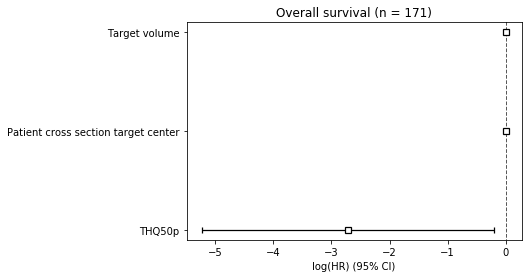

In [43]:
fig_cox_3 = plt.figure()
ax_cox_3 = fig_cox_3.add_subplot(111)

cph_3.plot(ax = ax_cox_3)
ax_cox_3.set_title("Overall survival (n = {})".format(len(data_cox_3)))

cph_3.summary.p

### Estimate of variation in parameter

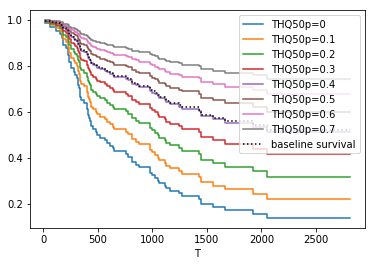

In [44]:
cph_3.plot_covariate_groups("THQ50p", np.linspace(0, 0.7, 8))